<a href="https://colab.research.google.com/github/jaiswalgaurav012002/deep_learning_project/blob/main/CNN%2B_Classic_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn


  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_vendor/packaging/_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File 

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

2024-04-30 16:15:41.769837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 16:15:41.769966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 16:15:41.900149: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
import pandas as pd

file_path = '/kaggle/input/traindata1/train.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("file has been found")
else:
    print(f"File not found: {file_path}. Please upload the dataset or correct the file path.")

file has been found


In [ ]:
import pandas as pd

# Path to your CSV file
file_path = '/kaggle/input/traindata1/train.csv'  # Update with your CSV file path

# Read the CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head())  # Show the first few rows

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [ ]:
df.head(20)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
!pip list


Package                                  Version
---------------------------------------- -------------------
absl-py                                  1.4.0
accelerate                               0.29.3
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.12.3
aiofiles                                 22.1.0
aiohttp                                  3.9.1
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
aiosqlite                                0.19.0
albumentations                           1.4.0
alembic                                  1.13.1
altair                                   5.3.0
annotated-types                          0.6.0
annoy                                    1.17.3
anyio                                    4.2.0
apache-beam                          

In [ ]:
from tensorflow.keras.layers import TextVectorization
X = df['comment_text']
y = df[df.columns[2:]].values
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
vectorizer.adapt(X.values)
vectorized_text = vectorizer(X.values)
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense

# Define the model
model = Sequential()
model.add(Embedding(input_dim=MAX_FEATURES, output_dim=32))  # Adjust input_dim and output_dim
model.add(Conv1D(64, 5, activation='relu'))  # Convolutional layer
model.add(MaxPooling1D(pool_size=4))  # MaxPooling layer
model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True)))  # Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, activation='tanh')))  # Bidirectional LSTM layer
model.add(Dense(128, activation='relu'))  # Dense layer
model.add(Dense(6, activation='sigmoid'))  # Output layer for multi-label classification

# Compile the model
model.compile(
    loss='binary_crossentropy',  # Loss function for multi-label classification
    optimizer='Adam',
    metrics=['accuracy', 'binary_accuracy', 'categorical_accuracy']
)

# Train the model
for epoch in range(1, 6):  # Assuming 5 epochs
    history = model.fit(
        train,
        epochs=1,  # Train for 1 epoch at a time
        validation_data=val,
        verbose=1
    )

    print(f"Epoch {epoch}/5")
    print(f"Training Accuracy: {history.history['accuracy'][0]:.4f}")
    print(f"Training Binary Accuracy: {history.history['binary_accuracy'][0]:.4f}")
    print(f"Training Categorical Accuracy: {history.history['categorical_accuracy'][0]:.4f}")
    print(f"Training Loss: {history.history['loss'][0]:.4f}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][0]:.4f}")
    print(f"Validation Binary Accuracy: {history.history['val_binary_accuracy'][0]:.4f}")
    print(f"Validation Categorical Accuracy: {history.history['val_categorical_accuracy'][0]:.4f}")
    print(f"Validation Loss: {history.history['val_loss'][0]:.4f}")


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 446s 63ms/step - accuracy: 0.9723 - binary_accuracy: 0.9738 - categorical_accuracy: 0.9723 - loss: 0.0833 - val_accuracy: 0.9942 - val_binary_accuracy: 0.9833 - val_categorical_accuracy: 0.9942 - val_loss: 0.0454
Epoch 1/5
Training Accuracy: 0.9871
Training Binary Accuracy: 0.9788
Training Categorical Accuracy: 0.9871
Training Loss: 0.0614
Validation Accuracy: 0.9942
Validation Binary Accuracy: 0.9833
Validation Categorical Accuracy: 0.9942
Validation Loss: 0.0454
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 439s 63ms/step - accuracy: 0.9905 - binary_accuracy: 0.9834 - categorical_accuracy: 0.9905 - loss: 0.0442 - val_accuracy: 0.9940 - val_binary_accuracy: 0.9855 - val_categorical_accuracy: 0.9940 - val_loss: 0.0383
Epoch 2/5
Training Accuracy: 0.9887
Training Binary Accuracy: 0.9833
Training Categorical Accuracy: 0.9887
Training Loss: 0.0443
Validation Accuracy: 0.9940
Validation Binary Accuracy: 0.9855
Validation Categorical Accuracy: 0.9940
Validation Loss: 0.0383


997/997 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24
Mean Absolute Error (MAE): 0.07
ROC AUC: 0.65


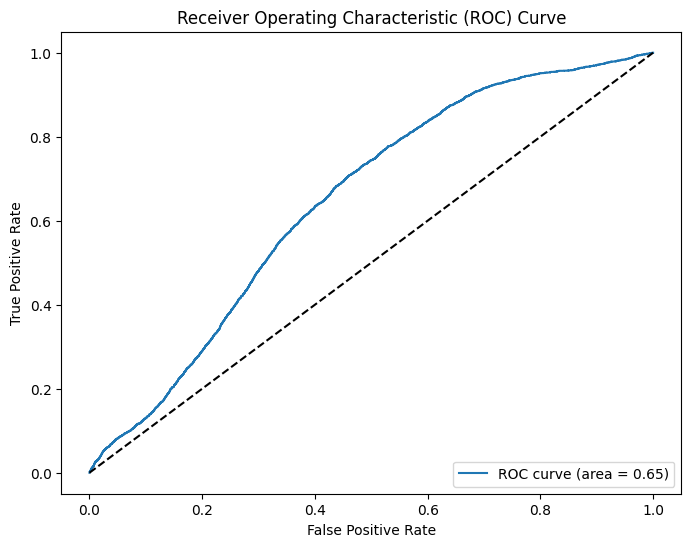

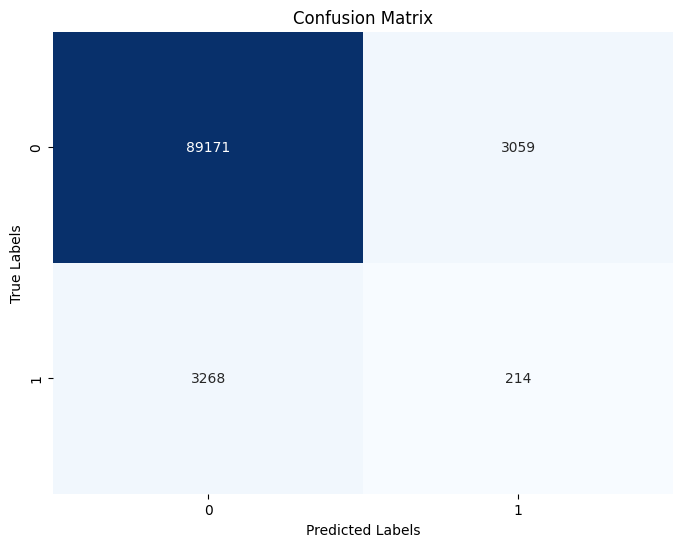

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on the test set
yhat = model.predict(test)  # Model predictions
y_true = []
for batch in test.as_numpy_iterator():
    _, y = batch  # Extract true labels
    y_true.extend(y)  # Add to the true labels list

# Convert to numpy arrays for Scikit-learn metrics
y_true = np.array(y_true).flatten()  # Flatten to 1D
yhat = np.array(yhat).flatten()  # Flatten predictions to 1D

# Calculate accuracy (binary threshold at 0.5)
accuracy = accuracy_score(y_true, yhat > 0.5)

# Calculate precision, recall, and F1 score (weighted for multi-label)
precision = precision_score(y_true, yhat > 0.5, average='weighted')  # Weighted precision
recall = recall_score(y_true, yhat > 0.5, average='weighted')  # Weighted recall
f1 = f1_score(y_true, yhat > 0.5, average='weighted')  # Weighted F1 score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, yhat)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, yhat)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, yhat)  # ROC curve
roc_auc = roc_auc_score(y_true, yhat)  # AUC score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, yhat > 0.5)  # Confusion matrix with a threshold of 0.5

# Display the calculated metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Example input text
input_text = 'Shut Up you fucking bastard.'

# Vectorize the text input and ensure it has a batch dimension
vectorized_text = vectorizer(tf.constant([input_text]))  # Wrap the input in a list for batch dimension

# Make a prediction
res = model.predict(vectorized_text)

# Convert the result to binary (threshold at 0.5)
binary_res = (res > 0.5).astype(int)

print("Prediction:", binary_res)  # Display the prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: [[1 1 1 0 1 0]]
